In [99]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math

In [100]:
file = "./tc1.csv"
data = pd.read_csv(file)



TCPdata = data[data["Protocol"]=="TCP"]


Part 1

In [101]:

SYNdata = TCPdata[TCPdata["Info"].str.contains("\[SYN\]")]
SYNdataDest = SYNdata[TCPdata["Info"].str.contains(">  21")]
SYNdataSrc = SYNdata[TCPdata["Info"].str.contains("21  >")]   #dont take this one
UniqueServer = set(SYNdataSrc["Source"].unique().tolist()) | set(SYNdataDest["Destination"].unique().tolist())
len(UniqueServer)

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


59

Part 2

In [102]:
# data["SrcPort"] = data["Info"][data["Info"].str.extract(pat = '(\d+)  >  (\d+)')
tempList = TCPdata["Info"].tolist()
srcList = [string[:string.find("[")].strip().split('  >  ')[0] for string in tempList]
destList = [string[:string.find("[")].strip().split('  >  ')[1] for string in tempList]
srcList, destList
TCPdata["SrcPort"] = srcList
TCPdata["DestPort"] = destList
uniqueTCPflows = TCPdata.drop_duplicates(subset = ["Source", "Destination", "SrcPort", "DestPort"])
len(uniqueTCPflows)


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


3256

Part 3

<BarContainer object of 24 artists>

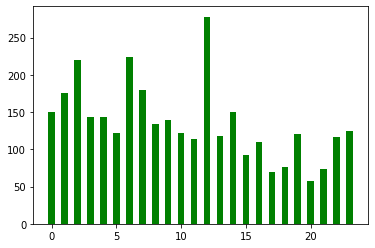

In [103]:
TCPfrequency = {}
for i in range(24):
    TCPfrequency[i] = 0
    
timeList = uniqueTCPflows["Time"].tolist()
timeList = [int(time // 3600) for time in timeList]
for time in timeList:
    TCPfrequency[time] += 1
TCPfrequency

plt.bar(TCPfrequency.keys(), TCPfrequency.values(), 0.5, color='g')

Part 4 and 5

In [104]:
SYNdata = TCPdata[TCPdata["Info"].str.contains("\[SYN\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]
SYNdata = SYNdata[TCPdata["Info"].str.contains(">  21")]
FINdata = TCPdata[TCPdata["Info"].str.contains("\[FIN, ACK\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]
RSTdata = TCPdata[TCPdata["Info"].str.contains("\[RST\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]





/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [174]:
timeList = []
ClientDataList = []              #sent by client
ServerDataList = []              #sent by server
FlowData = []
for i in range(len(SYNdata)):
    startTime = SYNdata.iloc[i,1]
    Src = SYNdata.iloc[i,2]
    Dest = SYNdata.iloc[i,3]
    SrcPort = SYNdata.iloc[i,7]
    DestPort = SYNdata.iloc[i,8]


    validFIN1 = FINdata[(FINdata["Source"] == Src) & (FINdata["Destination"] == Dest) & (FINdata["SrcPort"] == SrcPort) & (FINdata["DestPort"] == DestPort) & (FINdata["Time"]>startTime)]
    validFIN2 = FINdata[(FINdata["Source"] == Dest) & (FINdata["Destination"] == Src) & (FINdata["SrcPort"] == DestPort) & (FINdata["DestPort"] == SrcPort) & (FINdata["Time"]>startTime)]
    validRST1 = RSTdata[(RSTdata["Source"] == Src) & (RSTdata["Destination"] == Dest) & (RSTdata["SrcPort"] == SrcPort) & (RSTdata["DestPort"] == DestPort) & (RSTdata["Time"]>startTime)]
    validRST2 = RSTdata[(RSTdata["Source"] == Dest) & (RSTdata["Destination"] == Src) & (RSTdata["SrcPort"] == DestPort) & (RSTdata["DestPort"] == SrcPort) & (RSTdata["Time"]>startTime)]
    
    validFrames =  pd.concat([validFIN1, validFIN2, validRST1, validRST2])
    
#     print(SYNdata.iloc[i])
    if(len(validFrames)==0):
        continue
    
    
    endTime = validFrames['Time'].min()

    ClientDataTable = TCPdata[(TCPdata["Source"] == Src) & (TCPdata["Destination"] == Dest) & (TCPdata["SrcPort"] == SrcPort) & (TCPdata["DestPort"] == DestPort) & (TCPdata["Time"]>=startTime) & (TCPdata["Time"]<=endTime)]
    ServerDataTable = TCPdata[(TCPdata["Source"] == Dest) & (TCPdata["Destination"] == Src) & (TCPdata["SrcPort"] == DestPort) & (TCPdata["DestPort"] == SrcPort) & (TCPdata["Time"]>=startTime) & (TCPdata["Time"]<=endTime)]
    
    
    flowTime = endTime - startTime
    ClientData = ClientDataTable['Length'].sum()
    ServerData = ServerDataTable['Length'].sum()


    
    timeList.append(flowTime)
    ClientDataList.append(ClientData)
    ServerDataList.append(ServerData)


    print([flowTime, ClientData, ServerData])
    FlowData.append([flowTime, ClientData, ServerData])

    
    



[206.338153, 1312, 2330]
[203.375744, 1250, 2272]
[603.659119, 16856, 116]
[43.86362999999997, 818, 116]
[13.113835000000023, 1034, 116]
[46.00889799999999, 926, 2596]
[6.368038000000013, 278, 436]
[36.750586, 332, 436]
[10.782392999999956, 278, 436]
[9.443017000000054, 332, 436]
[1.309340000000077, 240, 108]
[45.64901699999996, 402, 54]
[12.875654999999938, 1142, 116]
[35.757295, 1046, 1192]
[156.97324500000002, 332, 112]
[0.9624669999999469, 170, 58]
[900.833137, 170, 112]
[307.9501799999998, 560, 760]
[66.74120299999993, 1196, 166]
[78.48749399999997, 236, 436]
[434.9990879999998, 668, 470]
[10.138104000000112, 236, 436]
[13.40145399999983, 872, 116]
[32.57486599999993, 764, 58]
[43.15182699999991, 386, 382]
[36.69968800000015, 386, 382]
[1.5709870000000592, 536, 206]
[1.4875600000002578, 536, 206]
[2.364565000000084, 536, 206]
[2.4656109999998534, 344, 652]
[4.084009999999807, 344, 652]
[12.652383999999984, 818, 116]
[310.19601000000034, 344, 598]
[1.393992000000253, 404, 206]
[2.6

[72.86547899999823, 560, 280]
[12.939656999998988, 710, 116]
[303.98131099999955, 398, 598]
[12.996957999999722, 656, 58]
[311.8812199999993, 560, 760]
[355.75136999999995, 402, 922]
[22.379344999999375, 278, 328]
[154.3049119999996, 332, 328]
[72.91381899999942, 386, 436]
[314.4718099999991, 398, 598]
[100.38396099999954, 332, 706]
[302.6569049999998, 386, 2326]
[13.399917000000642, 1196, 116]
[12.59686099999999, 1628, 58]
[2.848094000000856, 548, 598]
[28.12455399999999, 386, 216]
[23.598779999998442, 332, 162]
[13.561176999999589, 386, 436]
[63.80606799999987, 1844, 116]
[89.87199200000032, 344, 544]
[65.24615399999857, 1898, 116]
[602.9931649999999, 25604, 220]
[22.345366999998078, 278, 328]
[300.19220900000073, 278, 382]
[47.98352300000079, 332, 598]
[43.50117499999942, 386, 436]
[107.93921999999839, 332, 382]
[468.8863590000001, 992, 1300]
[13.444456000001082, 872, 116]
[12.47547399999894, 1034, 112]
[346.5624709999993, 494, 976]
[17.915014999998675, 398, 436]
[6.187869999999748,

[6.886451999998826, 404, 206]
[14.670643999997992, 344, 652]
[15.099034999999276, 404, 206]
[19.212601999999606, 404, 206]
[3.4449229999991076, 404, 206]
[35.248735000001034, 404, 206]
[15.976788999996643, 344, 490]
[72.54695500000162, 3356, 1246]
[10.360564000002341, 344, 490]
[36.87517999999909, 564, 598]
[24.449092000002565, 402, 382]
[21.937784999998257, 402, 382]
[69.46886799999629, 348, 382]
[2.803099000000657, 186, 220]
[2.8248710000007122, 186, 220]
[2.7950109999983397, 240, 220]
[2.813748000000487, 186, 220]
[2.8507559999998193, 240, 220]
[1.6154660000029253, 186, 166]
[3.7867889999979525, 186, 166]
[4.029559000002337, 186, 166]
[3.946654999996099, 186, 166]
[3.804125999999087, 186, 166]
[3.602167000004556, 186, 166]
[7.811776000002283, 186, 166]
[42.69766299999901, 480, 440]
[42.42209500000172, 426, 440]
[15.346717000000353, 264, 278]
[15.328718000000663, 264, 278]
[19.16385900000023, 372, 170]
[39.720594999998866, 402, 382]
[39.4605879999981, 348, 382]
[12.399287999996886, 1

[4.351641000001109, 452, 544]
[1.8840329999948153, 332, 652]
[3.6449740000025486, 398, 544]
[313.93315599999187, 494, 598]
[77.52353099999891, 224, 328]
[6.949368999994476, 332, 652]
[604.6422740000053, 12212, 116]
[77.97389999999723, 224, 328]
[502.80556299999444, 2654, 116]
[78.07768000000215, 224, 328]
[9.93129300000146, 224, 490]
[5.881122000006144, 224, 490]
[41.71240800000669, 386, 116]
[77.5555450000029, 224, 328]
[18.045677000001888, 386, 116]
[43.06733700000041, 548, 170]
[332.128546999993, 224, 116]
[3.030980000003183, 344, 598]
[78.43312100000912, 224, 328]
[360.73681999999826, 776, 216]
[237.32294900000124, 656, 116]
[0.6777689999944414, 452, 436]
[78.98034400000324, 224, 328]
[36.76032500000292, 278, 116]
[39.071227999993425, 224, 328]
[4.1584380000058445, 398, 544]
[3.225754999999481, 398, 544]
[57.263656999995874, 278, 116]
[63.899757999999565, 1736, 116]
[142.65902500000084, 2654, 170]
[0.8471100000024308, 224, 436]
[1.71106200000213, 224, 436]
[299.7738720000052, 224, 

[88.88946799999394, 404, 206]
[10.358684000006178, 224, 216]
[6.179046000004746, 116, 216]
[6.341352999996161, 116, 216]
[7.239166000006662, 116, 162]
[6.408418999999412, 170, 216]
[9.889085999995586, 224, 324]
[5.962108999992779, 344, 436]
[5.338562999997521, 116, 270]
[6.2782700000025216, 116, 216]
[8.179893000000448, 224, 270]
[6.168859000004886, 224, 162]
[5.739395999997214, 116, 270]
[5.849390000003041, 116, 216]
[92.35934099999577, 404, 206]
[6.6285250000000815, 116, 216]
[6.418487000002642, 278, 216]
[7.129327000002377, 116, 216]
[10.968057999998564, 170, 216]
[11.529443000006722, 116, 270]
[101.45934099999431, 170, 324]
[51.29540099999576, 386, 382]
[184.74220300000889, 404, 206]
[1.372773999995843, 170, 116]
[17.068929000000935, 170, 270]
[129.7560319999975, 494, 598]
[901.9965559999982, 170, 170]
[326.6600760000001, 278, 216]
[51.116642000000866, 386, 652]
[48.40659599999344, 386, 382]
[62.97233899999992, 1682, 116]
[393.64820000000327, 734, 206]
[18.61881700000231, 440, 436]

[3.315345000002708, 290, 598]
[14.444940000001225, 344, 652]
[303.71063099999446, 560, 760]
[364.95498199999565, 39482, 116]
[3.32331599999452, 404, 206]
[2.3102799999905983, 404, 206]
[3.0378319999945234, 404, 206]
[5.147692999991705, 332, 652]
[2.7907170000107726, 398, 652]
[3.0056129999939003, 332, 706]
[7.6282869999995455, 278, 112]
[3.261652999994112, 274, 652]
[133.62414099999296, 290, 220]
[603.4891889999999, 16586, 166]
[128.9118129999988, 224, 598]
[191.57813299998816, 224, 166]
[8.940768999993452, 722, 324]
[2.582215999995242, 182, 652]
[67.83380699999543, 2060, 170]
[303.71017899999424, 452, 760]
[1.643054000007396, 240, 162]
[8.870490999994217, 294, 54]
[608.8844049999898, 20204, 116]
[14.088131999997131, 440, 2272]
[8.967076999993878, 452, 544]
[312.39043700000184, 452, 598]
[1.290328999995836, 236, 760]
[63.4047489999939, 1844, 116]
[4.7872130000032485, 494, 62]
[604.1529779999983, 16482, 120]
[603.5581139999995, 16644, 120]
[156.68792500000563, 7190, 2488]
[604.240641000

[62.1235619999934, 1736, 116]
[12.878699000008055, 602, 116]
[67.23859999999695, 290, 220]
[12.79979399999138, 980, 58]
[903.6970200000069, 170, 116]
[13.24866500000644, 440, 598]
[6.7797690000152215, 536, 206]
[1.2452849999972386, 536, 206]
[1.407426999998279, 536, 206]
[1.9132280000048922, 536, 206]
[3.0299309999973048, 344, 598]
[10.064157000000705, 278, 544]
[12.616789000006975, 1196, 58]
[9.047204999995301, 722, 270]
[602.5298370000091, 32678, 116]
[2.5587430000014137, 236, 652]
[17.206489999996847, 1142, 116]
[610.3713560000033, 11078, 116]
[13.186982000013813, 1034, 58]
[8.377981000012369, 170, 166]
[5.969826999993529, 278, 116]
[12.606477999986964, 926, 58]
[325.0799800000095, 548, 652]
[2.3789550000074087, 344, 544]
[1.5289349999948172, 236, 598]
[2.944063000002643, 290, 436]
[8.301801000008709, 344, 162]
[4.8811229999992065, 344, 544]
[1.8969930000021122, 224, 58]
[13.77915899999789, 710, 116]


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


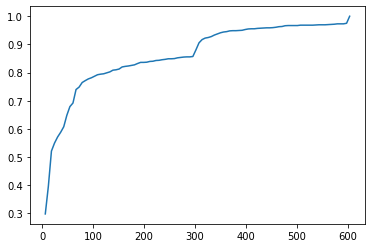

In [175]:
timeList.sort()
timeList = timeList[:math.ceil(0.9*len(timeList))]
num_bins = 100
counts, bin_edges = np.histogram (timeList, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

ValueError: x and y must be the same size

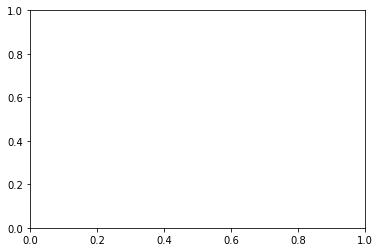

In [179]:
# FlowData = np.array(FlowData)
xData = [i[1] for i in FlowData]
yData = [i[2] for i in FlowData]

plt.scatter(xData, yData)
plt.show()